# Astucia Naval

## Importar las librerías a usar

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Graficar tablero en matplotlib

Función para graficar un tablero de juego dadas dos matrices, una correspondiente a los barcos y la otra a los ataques.
Para la matriz de **barcos**:



*   Un espacio sin barco y no atacado es representado por un 0 (int)
*   Un espacio con barco y no atacado es representado por un 1 (int)
*   Un espacio con barco y no atacado es representado por un 2 (int)
*   Un espacio con barco atacado es representado por un 3 (int)

Para la matriz de **ataques**:


*   Un espacio no atacado es representado por un 0 (int)
*   Un espacio atacado que no impactó a ningún barco es representado por un 1 (int)

*   Un espacio atacado que no impactó a ningún barco es representado por un 2 (int)

In [169]:
def graficar_tablero(BARCOS, ATAQUE):
  """
  Función para graficar un tablero de juego dadas dos matrices, una correspondiente a los barcos y la otra a los ataques.
Para la matriz de barcos:

*   Un espacio sin barco y no atacado es representado por un 0 (int)
*   Un espacio con barco y no atacado es representado por un 1 (int)
*   Un espacio con barco y no atacado es representado por un 2 (int)
*   Un espacio con barco atacado es representado por un 3 (int)

Para la matriz de **ataques**:


*   Un espacio no atacado es representado por un 0 (int)
*   Un espacio atacado que no impactó a ningún barco es representado por un 1 (int)

*   Un espacio atacado que no impactó a ningún barco es representado por un 2 (int)
  """
  # Primero se verifica que las dimensiones de las matrices sean las mismas
  if (np.array(BARCOS).shape==np.array(ATAQUE).shape):
    N = np.array(BARCOS).shape[0]
  else:
    raise ValueError("Las dimensiones de las matrices son diferentes")
  # Define figura con un axes 3d maximizando el espacio de graficación
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  fig.subplots_adjust(left=0,bottom=0,top=1,right=1)
  # Define arrays necesarios para la graficación del tablero de astucia naval como
  # graficos de barras para el tablero de ataque y grafico de barras 3d para el 
  # tablero de barcos
  left=np.arange(N)
  height=np.ones(N)
  zs=height*N
  B_Color = []
  for i in range(N):
    A_Color = []
    # Analiza las matrices de barcos para asignar colores
    for j in range(N):
      if BARCOS[N-i-1][j]==0:
        B_Color.append('#00FFFF')
      elif BARCOS[N-i-1][j]==1:
        B_Color.append('#999999')
      elif BARCOS[N-i-1][j]==2:
        B_Color.append('b')
      else:
        B_Color.append('r')
    # Analiza las matrices de ataque para asignar colores
    for j in range(N):
      if ATAQUE[i][j]==0:
        A_Color.append('c')
      elif ATAQUE[i][j]==1:
        A_Color.append('b')
      else:
        A_Color.append('r')
    # Grafica el tablero de ataque linea por línea
    ax.bar(left,height-0.1,zs,zdir='y',color=A_Color,bottom=height*(N-1-i), align='edge')
  # Analiza los valores de la matriz de barcos para definir una matriz con las posiciones
  # donde están los barcos diferentes de cero. Esto con el fin de que correspondan a las
  # alturas de las barras en el bar3d y que los barcos se diferencien del mar por su altura
  _x = np.arange(N)
  _y = np.arange(N)
  _xx, _yy = np.meshgrid(_x, _y)
  x, y = _xx.ravel(), _yy.ravel()
  bottom = np.zeros_like(x)
  top = bottom +0.1 
  top = [(top[i+j] + 0.2*(BARCOS[N-i-1][j]==1)) for i in range (N) for j in range(N)]
  # Grafica la matriz de barcos en 3D
  ax.bar3d(x, y, bottom, 0.8, 0.7, top, shade=True, color = B_Color)
  # Define los límites de los ejes de las graficas
  ax.set_xlim(-0.3,N)
  ax.set_ylim(0,N)
  ax.set_zlim(0,N)
  # Organiza las etiquetas de los ejes
  ax.set_xticks(np.arange(N)+0.5)
  ax.set_xticklabels(np.arange(N))
  ax.set_yticks(np.arange(N+1)+0.5)
  ax.set_yticklabels([" "]+list(range(N-1,-1,-1)))
  ax.set_zticks(np.arange(N))
  ax.set_zticklabels(np.arange(N-1,-1,-1))
  # Cambia el ángulo de visualización
  ax.view_init(30, 290)
  # Título de la grafica
  plt.title("ASTUCIA NAVAL",fontsize=12)
  plt.show() 

Para mostrar como se ve un tablero de astucia naval usando la función anterior se define una matriz con algunos barcos y tres ataques en el tablero del jugador y dos ataques realizados en el tablero de ataque.

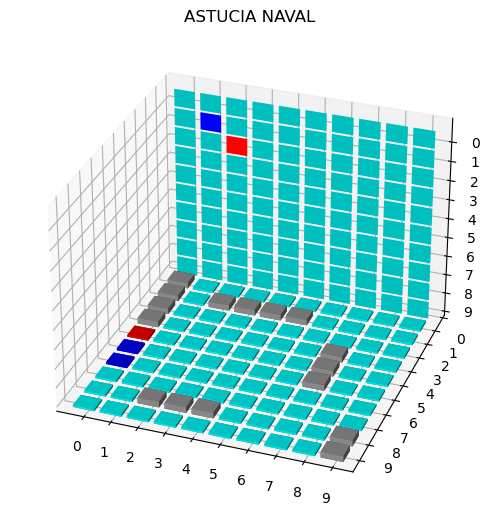

In [170]:
n=10
B = np.zeros(shape=(n,n))
A=np.zeros(shape=(n,n))
B[0:4,0]=1
B[4,0]=3
B[5:7,0]=2
B[1,2:6]=1
B[3:6,7]=1
B[8,2:5]=1
B[3:6,7]=1
B[8:,9]=1
A[1,1]=1
A[2,2]=2
graficar_tablero(B,A)

## ¿Cómo imprimir un tablero de astucia naval con el comando print?

Se deben tener dos matrices, una correspondiente a los barcos y la otra a los ataques.
Para la matriz de **barcos**:



*   Un espacio sin barco y no atacado es representado por un 0 (int)
*   Un espacio con barco y no atacado es representado por un 1 (int)
*   Un espacio con barco y no atacado es representado por un 2 (int)
*   Un espacio con barco atacado es representado por un 3 (int)

Para la matriz de **ataques**:



*   Un espacio no atacado es representado por un 0 (int)
*   Un espacio atacado que no impactó a ningún barco es representado por un 1 (int)

*   Un espacio atacado que no impactó a ningún barco es representado por un 2 (int)

Se crean dos funciones auxiliares, `convertir_A` y `convertir_A`, las cuales toman una matriz y coordenadas `i` `j` de la misma. Convierten el valor numérico en un caracter según las convenciones dadas arriba para que al imprimir el tablero se vea más esrtilizado.

Se crea la función imprimit_tablero, la cuál imprime un tablero N*N con N establecido por defecto en 10 para el
  juego de astucia Naval.
  Habrá un tablero frontal de ataque y uno diagonal de posicionamiento de barcos. 
  
  Para el tablero de barcos:
  Donde hay una posición de un barco sin atacar se pone la letra B. Donde hay una
  posición de barco atacado se pone X. Donde hay mar se deja vacío y donde se atacó
  pero no había barco se pone O.


  Para el tablero de ataque:
  Donde no se ha atacado se deja vacío, donde se atacó y no había barco se deja O
  y donde se atacó y había parte de un barco se pone X





In [ ]:
# EN CASO DE NO DESEAR IMPRIMIR CON MATPLOTLIB USAR LAS SIGUIENTES FUNCIONES
# EN LUGAR DE graficar_tablero

def convertir_A(ATAQUE,i,j):
  """
  Convierte la posición i,j de una materiz un enteron 0 en un espacio en blanco, un entero 1 en el caracter O y otro dato en el caracter X

  >>>convertir_A([[0,0,1],[0,2,1],[0,0,1]],1,2)
  0
  """
  if ATAQUE[i][j]==0:
    return(" ")
  elif ATAQUE[i][j]==1:
    return("O")
  else:
    return("X")


def convertir_B(BARCOS,i,j):
  """
  Convierte la posición i,j de una materiz un enteron 0 en un espacio en blanco,
  un entero 1 en el caracter B, un entero 2 en el caracter O y otro dato en el caracter X

  >>>convertir_A([[0,3,1],[0,2,1],[3,0,1]],1,2)
  B
  """
  if BARCOS[i][j]==0:
    return(" ")
  elif BARCOS[i][j]==1:
    return("B")
  elif BARCOS[i][j]==2:
    return("0")
  else:
    return("X")



def imprimit_tablero(BARCOS, ATAQUE):
  """
  Función que imprime un tablero N*N con N establecido por defecto en 10 para el
  juego de astucia Naval.
  Habrá un tablero frontal de ataque y uno diagonal de posicionamiento de barcos. 
  
  Para el tablero de barcos:
  Donde hay una posición de un barco sin atacar se pone la letra B. Donde hay una
  posición de barco atacado se pone X. Donde hay mar se deja vacío y donde se atacó
  pero no había barco se pone O.


  Para el tablero de ataque:
  Donde no se ha atacado se deja vacío, donde se atacó y no había barco se deja O
  y donde se atacó y había parte de un barco se pone X

  >>>import numpy as np
  >>>imprimit_tablero(np.random.randint(0,3, size=(10,10)), np.random.randint(0,3, size=(10,10)))
-----------------------------------------
| O | X | X |   |   | X | X | O |   | X |
-----------------------------------------
| X |   | X |   |   | O | O |   |   | X |
-----------------------------------------
|   | X | O | X |   | X | O | O |   |   |
-----------------------------------------
| X |   | X | O | O | X | X | X |   | X |
-----------------------------------------
| O |   |   | O | X | X | X | O | O |   |
-----------------------------------------
|   | O | O |   |   | O |   |   |   | O |
-----------------------------------------
| X | X |   | O | O | O |   | O |   | X |
-----------------------------------------
| O | O | O |   | X |   |   | X | X |   |
-----------------------------------------
| X | O | X | O | O | X | O | X | O |   |
-----------------------------------------
| X | O |   | X |   | X |   | X |   | O |
-----------------------------------------
\ B \ B \ X \ 0 \ X \ B \ 0 \   \ X \ B \ 
 -----------------------------------------
 \ X \ 0 \ X \ 0 \ 0 \ B \   \ 0 \ X \ B \ 
  -----------------------------------------
  \ B \ 0 \ 0 \   \   \   \ 0 \ 0 \ 0 \ B \ 
   -----------------------------------------
   \   \   \ X \ 0 \ X \ B \ B \ X \ X \ B \ 
    -----------------------------------------
    \ 0 \ X \ X \ B \   \ X \ X \ X \ 0 \ 0 \ 
     -----------------------------------------
     \ X \ B \ X \ X \ 0 \ B \ B \   \ B \ B \ 
      -----------------------------------------
      \ B \ 0 \   \ 0 \ 0 \   \ 0 \ 0 \ B \ X \ 
       -----------------------------------------
       \ 0 \ 0 \   \ 0 \ X \   \ X \ B \ B \ B \ 
        -----------------------------------------
        \ B \   \   \ 0 \ X \ X \ 0 \ B \   \ B \ 
         -----------------------------------------
         \ X \   \   \   \ X \ B \   \ 0 \ B \ X \ 
          -----------------------------------------
  """
  print("-"*41)
  for i in range(10):
   for j in range(10):
      print("| "+convertir_A(ATAQUE,i,j)+" ",end="")
   print("|")
   print("-"*41)
  for i in range(10):
   print(i*" ",end="")
   for j in range(10):
      print("\ "+convertir_B(BARCOS,i,j)+" ",end="",sep="")
   print("\ ")
   print((i+1)*" ","-"*41,sep="")

Para acceder a la documentación de cualquier función se usa el comando `help()`

In [ ]:
help(imprimit_tablero)

Help on function imprimit_tablero in module __main__:

imprimit_tablero(BARCOS, ATAQUE)
      Función que imprime un tablero N*N con N establecido por defecto en 10 para el
      juego de astucia Naval.
      Habrá un tablero frontal de ataque y uno diagonal de posicionamiento de barcos. 
      
      Para el tablero de barcos:
      Donde hay una posición de un barco sin atacar se pone la letra B. Donde hay una
      posición de barco atacado se pone X. Donde hay mar se deja vacío y donde se atacó
      pero no había barco se pone O.
    
    
      Para el tablero de ataque:
      Donde no se ha atacado se deja vacío, donde se atacó y no había barco se deja O
      y donde se atacó y había parte de un barco se pone X
    
      >>>import numpy as np
      >>>imprimit_tablero(np.random.randint(0,3, size=(10,10)), np.random.randint(0,3, size=(10,10)))
    -----------------------------------------
    | O | X | X |   |   | X | X | O |   | X |
    ----------------------------------------

Como ejemplo se muestra un tablero de juego con marcas arbitrarias

In [ ]:
imprimit_tablero(np.random.randint(0,4, size=(10,10)), np.random.randint(0,3, size=(10,10)))

-----------------------------------------
| O | X | X |   |   | X | X | O |   | X |
-----------------------------------------
| X |   | X |   |   | O | O |   |   | X |
-----------------------------------------
|   | X | O | X |   | X | O | O |   |   |
-----------------------------------------
| X |   | X | O | O | X | X | X |   | X |
-----------------------------------------
| O |   |   | O | X | X | X | O | O |   |
-----------------------------------------
|   | O | O |   |   | O |   |   |   | O |
-----------------------------------------
| X | X |   | O | O | O |   | O |   | X |
-----------------------------------------
| O | O | O |   | X |   |   | X | X |   |
-----------------------------------------
| X | O | X | O | O | X | O | X | O |   |
-----------------------------------------
| X | O |   | X |   | X |   | X |   | O |
-----------------------------------------
\ B \ B \ X \ 0 \ X \ B \ 0 \   \ X \ B \ 
 -----------------------------------------
 \ X \ 0 \ X \ 0 \ 0 \ B \   \ 0

## Funciones necesarias para el funcionamiento del juego

### Definir función vacía NxN

Se define una función que retorna una matriz NxN vacía

In [172]:
def matriz_vacia(N=10):
  """Función que retorna una matriz vacía

  Argumento:
      N (int, optional): Dimensión de la matriz. Por defecto 10.
  """
  M = []
  for i in range(N):
    M.append([])
    for j in range(N):
      M[i].append(0)
  return(M)


In [173]:
matriz_vacia()

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

### Ubicar barcos del computador

Función para ubicar un barco en una celda $10\times10$. Esta función no modifica la matriz ni tiene valor de retorno. Ubica el barco aleatoriamente. 

La función tomará dos argumentos:

1. barco: entero tamaño del barco (menor a 9)
2. horizontal: booleano que determina si el barco está o no horizontal

In [180]:
def ubicar_barcos(BARCOS, barco, horizontal):
  """
  Función para ubicar automáticamente un barco en una celda 10X10.
  No modifica la matriz ni tiene valor de retorno. Ubica el barco aleatoriamente.

  barco: tamaño del barco (menor a 9)

  horizontal: booleano
  """
  if horizontal == True:
    fila = np.random.randint(10-barco)
    columna = np.random.randint(10)
    while sum(np.array(BARCOS)[fila:fila+barco,columna])>0:
      fila = np.random.randint(10-barco)
      columna = np.random.randint(10)
    for i in range(fila,fila+barco,1):
      BARCOS[i][columna]=1
  else:
    columna = np.random.randint(10-barco)
    fila = np.random.randint(10)
    while sum(BARCOS[fila][columna:columna+barco])>0:
      columna = np.random.randint(10-barco)
      fila = np.random.randint(10)
    for i in range(columna,columna+barco,1):
      BARCOS[fila][i]=1

In [182]:
MAT = np.zeros(shape=(10,10))
ubicar_barcos(MAT,4,True)
MAT

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Ubicar barcos del jugador

Función para ubicar un barco en una celda $10\times10$. Esta función no modifica la matriz ni tiene valor de retorno. Ubica el barco pidiendole al jugador la posición desde la que ubicará la popa del barco. Previamente se le ingrsan dos argumentos, uno de ellos es un entero que corresponde al tamaño del barco y el otro un booleano que dice si se desea o no el barco horizontal. La proa del barco la ubica automáticamente hacia el sur(oriente) de donde tiene la popa.

La función tomará dos argumentos:

1. barco: entero tamaño del barco (menor a 9)
2. horizontal: booleano que determina si el barco está o no horizontal

In [183]:
def ubicar_barcos_jugador(BARCOS, barco, horizontal):
  """
  Función para ubicar un barco en una celda 10X10

  barco: tamaño del barco (menor a 9)

  horizontal: booleano
  """
  if horizontal == True:
    fila = int(input("Ingrese la posición de la FILA en que va a poner la popa del barco (Entre 0 y {})\t".format(10-barco)))
    columna = int(input("Ingrese la posición de la COLUMNA en que va a poner la popa del barco (Entre 0 y 9)\t"))
    while sum(np.array(BARCOS)[fila:fila+barco,columna])>0:
      fila = int(input("Se cruzaría con otro barco, ingrese otro valor para la FILA (Entre 0 y {})\t".format(10-barco)))
      columna = int(input("Se cruzaría con otro barco, ingrese otro valor para la COLUMNA (Entre 0 y 9)\t"))
    for i in range(fila,fila+barco,1):
      BARCOS[i][columna]=1
  else:
    fila = int(input("Ingrese la posición de la FILA en que va a poner la popa del barco (Entre 0 y 9)\t"))
    columna = int(input("Ingrese la posición de la COLUMNA en que va a poner la popa del barco (Entre 0 y {})\t".format(10-barco)))
    while sum(BARCOS[fila][columna:columna+barco])>0:
      fila = int(input("Se cruzaría con otro barco, ingrese otro valor para la FILA (Entre 0 y 9)\t"))
      columna = int(input("Se cruzaría con otro barco, ingrese otro valor para la COLUMNA (Entre 0 y {})\t".format(10-barco)))
    for i in range(columna,columna+barco,1):
      BARCOS[fila][i]=1

In [185]:
MAT = np.zeros(shape=(10,10))
ubicar_barcos_jugador(MAT,4,True)
print("La matriz con el barco ubicado es\n",MAT)

La matriz con el barco ubicado es
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Recibir y hacer ataques del jugador

Función que toma una matriz de barcos del jugador que defiende y la matriz de ataque del otro jugador. Pregunta donde se hará el ataque, verifica que no se hubiera atacado antes ahí y modifica los valores de las matrices de acuerdo al esquema de valores definido anteriormente.

In [187]:
def recibir_y_hacer_ataque(BARCOS, ATAQUE):
  """
Función que toma una matriz de barcos del jugador que defiende y la matriz de ataque del otro jugador. Pregunta donde se hará el ataque, verifica que no se hubiera atacado antes ahí y modifica los valores de las matrices de acuerdo al esquema de valores definido anteriormente.
Retorna las dos matrices modificadas
  
  Argumentos:
      BARCOS: Matriz de barcos del jugador que defiende.
      ATAQUE: Matriz de ataque del jugador que tiene el turno.
  """
  VALIDO = 0
  while VALIDO == 0:
    fila_a = int(input("¿A qué fila diriges el ataque? (Número de 0 a 9): "))
    columna_a = int(input("¿A qué columna diriges el ataque? (Número de 0 a 9): "))
    if BARCOS[fila_a][columna_a] == 0:
      print("No habían barcos")
      BARCOS[fila_a][columna_a] = 2
      ATAQUE[fila_a][columna_a] = 1
      VALIDO = 1
    elif BARCOS[fila_a][columna_a] == 1:
      print("¡¡¡IMPACTO!!!")
      BARCOS[fila_a][columna_a] = 3
      ATAQUE[fila_a][columna_a] = 2
      VALIDO = 1
    else:
      print("Ataque no válido, intenta nuevamente")
  return(BARCOS, ATAQUE)

### Recibir y hacer ataques del computador

Función que toma una matriz de barcos del jugador que defiende y la matriz de ataque del otro jugador. Genera dos números aleatorios para el ataque, verifica que no se hubiera atacado antes ahí y modifica los valores de las matrices de acuerdo al esquema de valores definido anteriormente.

In [188]:
def recibir_y_hacer_ataque_PC(BARCOS, ATAQUE):
  """Función que toma una matriz de barcos del jugador que defiende y la matriz de ataque del otro jugador. Genera dos números aleatorios para el ataque, verifica que no se hubiera atacado antes ahí y modifica los valores de las matrices de acuerdo al esquema de valores definido anteriormente.
  Retorna las dos matrices modificadas.
  
  Argumentos:
      BARCOS: Matriz de barcos del jugador
      ATAQUE: Matriz de ataque del computador
  """
  BARCOS = BARCOS[:]
  ATAQUE = ATAQUE[:]
  VALIDO = 0
  while VALIDO == 0:
    fila_a = np.random.randint(10)
    columna_a = np.random.randint(10)
    if BARCOS[fila_a][columna_a] == 0:
      print("Te atacó el computador en las posiciones fila: {}, columna: {} pero no habían barcos".format(fila_a,columna_a))
      BARCOS[fila_a][columna_a] = 2
      ATAQUE[fila_a][columna_a] = 1
      VALIDO = 1
    elif BARCOS[fila_a][columna_a] == 1:
      print("Te atacó el computador en las posiciones fila: {}, columna: {} e impactó con uno de tus barcos".format(fila_a,columna_a))
      BARCOS[fila_a][columna_a] = 3
      ATAQUE[fila_a][columna_a] = 2
      VALIDO = 1
  return(BARCOS, ATAQUE)

### Verificar victoria

Para verificar si alguno de los dos jugadores ganó se implementaron dos funciones.
La primera de ellas recibe la matriz de barcos de un jugador y retorna True en caso de que ningún barco quede en pié o False si queda al menos un barco vivo.
La segunda función usa la primera para ver si hay algun jugador que dejó al rival sin barcos, si ambos siguen en jueego o si ambos perdieron en la misma ronda.

In [189]:
def verificar_victoria_single(BARCOS):
  """recibe la matriz de barcos de un jugador y retorna True en caso de que ningún barco quede en pié o False si queda al menos un barco vivo.

  Argumentos:
      BARCOS: Matriz de barcos a verificar
  """
  for i in range(10):
    for j in range(10):
      if BARCOS[i][j]==1:
        return(False)
  return(True)

In [193]:
resultado_1 = verificar_victoria_single(np.zeros(shape=(10,10)))
Mat=np.zeros(shape=(10,10))
Mat[5,5]=2
Mat[6,6]=1
resultado_2 = verificar_victoria_single(Mat)
print("FUnción aplicada a matriz de ceros:",resultado_1)
print("FUnción aplicada a matriz con ceros, un 1 y un 2:",resultado_2)

FUnción aplicada a matriz de ceros: True
FUnción aplicada a matriz con ceros, un 1 y un 2: False


In [190]:
def verificar_victoria(BARCOS_1, BARCOS_2, JUGADOR_1="Jugador 1", JUGADOR_2="Jugador 2"):
  """Función que recibe las matrices de barcos de ambos jugadores, imprime en pantalla 
  si alguno de los dos ganó o si hubo empate y retorna 0 en caso de que siga el juego y 1 si ya terminó.

  Argumentos:
      BARCOS_1: Matriz de barcos del jugador 1
      BARCOS_2: Matriz de barcos del jugador 1
      JUGADOR_1 (str, optional): Nombre del jugador 1. Defaults to "Jugador 1".
      JUGADOR_2 (str, optional): Nombre del jugador 2. Defaults to "Jugador 2".
  """
  WIN_1=verificar_victoria_single(BARCOS_1)
  WIN_2=verificar_victoria_single(BARCOS_2)
  FIN = 0
  if WIN_1==True and WIN_2==False:
    print("Ganador", JUGADOR_1)
    FIN = 1
  elif WIN_1==False and WIN_2==True:
    print("Ganador", JUGADOR_2)
    FIN = 1
  elif WIN_1==True and WIN_2==True:
    print("Empate")
    FIN = 1
  return(FIN)  

In [196]:
Mat=np.zeros(shape=(10,10))
Mat[5,5]=2
Mat[6,6]=1
resultado = verificar_victoria(Mat,np.zeros(shape=(10,10)))
print("Función aplicada a matriz con ceros, un 1 y un 2 y a una matriz de ceros:",resultado)

resultado_2 = verificar_victoria(Mat,Mat)
print("Función aplicada dos matrices con ceros, un 1 y un 2:",resultado_2)


Ganador Jugador 2
Función aplicada a matriz con ceros, un 1 y un 2 y a una matriz de ceros: 1
Función aplicada dos matrices con ceros, un 1 y un 2: 0


### Juego implementado

Se han unido las funciones de forma adecuada para dar sentido al juego de astucia naval

In [ ]:
JUGADOR= input("Ingrese el nombre del jugador 1: ")

BARCO_PC = matriz_vacia()
ATAQUE_PC = matriz_vacia()
BARCO_JUGADOR = matriz_vacia()
ATAQUE_JUGADOR = matriz_vacia()

#Ubica barcos del computador
ORIENTACION = [True, False]
for barco in [2,3,3,4,5]:
  POS = ORIENTACION[np.random.randint(0,2)]
  ubicar_barcos(BARCO_PC, barco, POS)

#Ubica barcos jugador
for barco in [2,3,3,4,5]:
  print("\n\nUbicaremos un barco de tamaño",barco)
  horizontal = input("Si desea ubicar su barco vertical ingrese SI, de lo contrario ingrese cualquier otra cosa:\t")
  ubicar_barcos_jugador(BARCO_JUGADOR, barco, horizontal.lower()=="si")


# Imprime franjas para dividir
print("*"*50)
print("*"*50)
print("*"*50)

#Inicio del juego

print("INICIA EL JUEGO, ¡QUE GANE EL MEJOR!")
FIN = 0
while FIN==0:
  # Ataque del jugador
  print("          ATAQUE DE ",JUGADOR)
  BARCO_PC,ATAQUE_JUGADOR = recibir_y_hacer_ataque(BARCO_PC,ATAQUE_JUGADOR)
  #Ataque del PC
  print("          ATAQUE DEL PC ")
  BARCO_JUGADOR,ATAQUE_PC = recibir_y_hacer_ataque_PC(BARCO_JUGADOR,ATAQUE_PC)
  graficar_tablero(BARCO_JUGADOR,ATAQUE_JUGADOR)
  #Verificar victoria
  FIN = verificar_victoria(BARCO_JUGADOR, BARCO_PC, JUGADOR_1=JUGADOR, JUGADOR_2="Computador")
  if FIN == 0:
      print("\n\n")